#importing important libiraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
d = pd.read_csv('DUMD_train.csv')
d1 = pd.read_csv('DUMD_test.csv')

#Functions

In [3]:
def getAccuracy(model, x, y):                    #Accuracy Calc
    return model.score(x,y)*100
def convert(z):                              #Labeling classes 0,1,2,3
    le = preprocessing.LabelEncoder()
    z.UNS=le.fit_transform(z.UNS)
    return z
def error(yt,yp):                          #ploting error points
    _, ax = plt.subplots()
    ax.scatter(x = range(0, yt.size), y=yt, c = 'blue', label = 'Actual', alpha = 0.3)
    ax.scatter(x = range(0, yp.size), y=yp, c = 'red', label = 'Predicted', alpha = 0.3)
    plt.title('Actual and predicted values')
    plt.xlabel('Observations')
    plt.ylabel('predicted')
    plt.legend()
    plt.show()
def find_majority(k):                        #Voting the most class occurance in OVO models
    myMap = {}
    maximum = ( '', 0 ) # (occurring element, occurrences)
    for n in k:
        if n in myMap: myMap[n] += 1
        else: myMap[n] = 1

        # Keep track of maximum on the go
        if myMap[n] > maximum[1]: maximum = (n,myMap[n])  
    return 'The Major Class is',n,' It occured',myMap[n]
def fitov(model,xtr,y,xte,yte):               #fitting and predict and call some functions
    ot=model.fit(xtr, y)
    otp= model.predict(xte)
    plt.title('Decision Boundries for the OVO',fontsize=20,loc='center',color='green')
    plot_decision_regions(xte,yte, clf=model, legend=3)
    find_majority(otp)
    plt.xlabel('Data')
    plt.ylabel('Target Column')
    print('Voting To Find Majority:',find_majority(otp))
    print('Accuracy OVO : {:.2f}%'.format(getAccuracy(model, xte, yte))) 
convert(d)
convert(d1)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,0
319,0.85,0.82,0.66,0.83,0.83,0
320,0.56,0.60,0.77,0.13,0.32,1
321,0.66,0.68,0.81,0.57,0.57,2


[0.07411854 0.06371773 0.06827339 0.15728425 0.6366061 ]


Text(0, 0.5, 'Features')

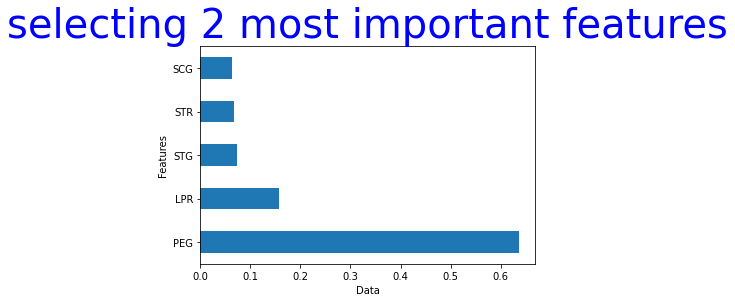

In [29]:
X = d.iloc[:,0:5]  #independent columns
y = d.iloc[:,-1].to_numpy()    #target column 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('selecting 2 most important features',fontsize=40,loc='center',color='blue')
plt.xlabel('Data')
plt.ylabel('Features')
#using 2 different model to select important features we found that the ExtraTreesClassifier(LPR,PEG) is better than mutual_info_classif(STG,PEG)
#comparing the output accuracy to the features from both models we found that features from ExtraTrees is more accurat 

In [30]:
#taking the selected feature from training,testing data
xtr=d[['PEG', 'LPR']].to_numpy()  #independent columns
xte=d1[['PEG', 'LPR']].to_numpy()    #independent columns
yte = d1.iloc[:,-1].to_numpy()   #target column 

Accuracy of model: 98.75%


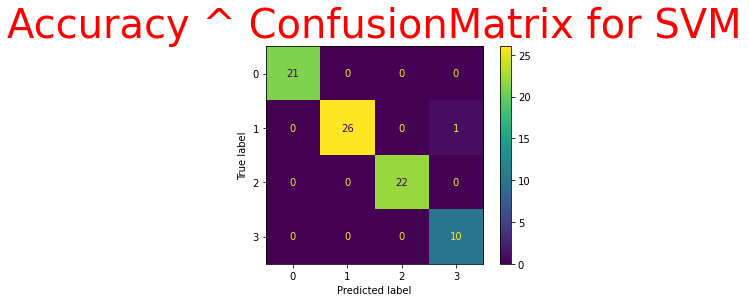

In [31]:
#SVM Part
model = SVC()
model.fit(xtr, y)
ypred=model.predict(xte)
ConfusionMatrixDisplay(confusion_matrix(ypred, yte)).plot()
plt.title('Accuracy ^ ConfusionMatrix for SVM',fontsize=40,loc='center',color='red')
print('Accuracy of model: {:.2f}%'.format(getAccuracy(model,xte, yte)))

C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


Text(0, 0.5, 'Target Column')

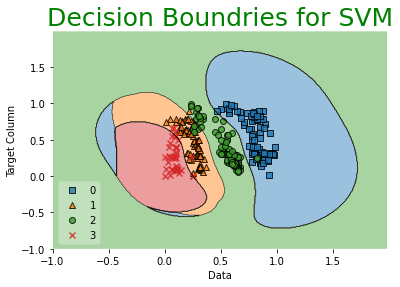

In [32]:
#Continue SVM part
plt.title('Decision Boundries for SVM',fontsize=25,loc='center',color='Green')
plot_decision_regions(xtr,y, clf=model, legend=3)
plt.xlabel('Data')
plt.ylabel('Target Column')

C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


Accuracy of model: 60.00%


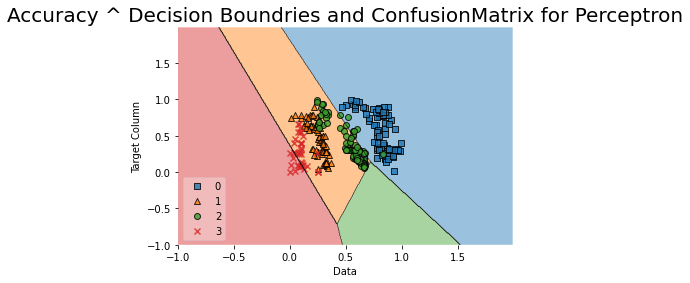

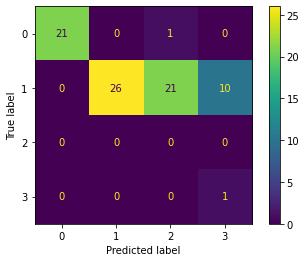

In [33]:
#perceptron part
perceptron_model= Perceptron(random_state=0)
perceptron_model.fit(xtr, y)
y_prod_pre=perceptron_model.predict(xte)
plt.title('Accuracy ^ Decision Boundries and ConfusionMatrix for Perceptron',fontsize=20,loc='center',color='black')
plot_decision_regions(xtr,y, clf=perceptron_model, legend=3)
plt.xlabel('Data')
plt.ylabel('Target Column')
ConfusionMatrixDisplay(confusion_matrix(y_prod_pre, yte)).plot()
print('Accuracy of model: {:.2f}%'.format(getAccuracy(perceptron_model,xte, yte)))

In [34]:
 ####binarized labels
mlb = MultiLabelBinarizer()
yb = y.reshape((-1,1))
yb = mlb.fit_transform(yb)
ybt = yte.reshape((-1,1))
ybt = mlb.fit_transform(ybt)

In [35]:
yb1 = yb[:,0]
yb2 = yb[:,1]
yb3 = yb[:,2]
yb4 = yb[:,3]
ybt1 = ybt[:,0]
ybt2 = ybt[:,1]
ybt3 = ybt[:,2]
ybt4 = ybt[:,3]

Accuracy of clf_1: 100.00%


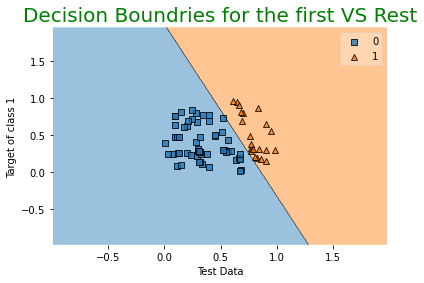

In [36]:
##OVR problem
clf_1 = SVC(kernel='linear', probability=True)
clf_1.fit(xtr, yb1)
print('Accuracy of clf_1: {:.2f}%'.format(getAccuracy(clf_1, xte, ybt1)))
plt.title('Decision Boundries for the first VS Rest',fontsize=20,loc='center',color='green')
plt.xlabel('Test Data')
plt.ylabel('Target of class 1')
plot_decision_regions(xte,ybt1, clf=clf_1, legend=1)
yb1_pred = clf_1.predict_proba(xte)[:,1].reshape(-1,1)

Accuracy of clf_2: 80.00%


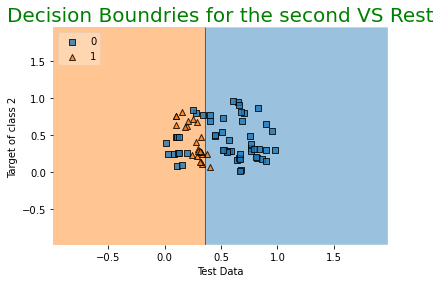

In [37]:
##cont. OVR problem

clf_2 = SVC(kernel='linear', probability=True)
clf_2.fit(xtr, yb2)
print('Accuracy of clf_2: {:.2f}%'.format(getAccuracy(clf_2, xte, ybt2)))
plt.title('Decision Boundries for the second VS Rest',fontsize=20,loc='center',color='green')
plt.xlabel('Test Data')
plt.ylabel('Target of class 2')
plot_decision_regions(xte,ybt2, clf=clf_2, legend=2)
yb2_pred = clf_2.predict_proba(xte)[:,1].reshape(-1,1)

Accuracy of clf_3: 72.50%


C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


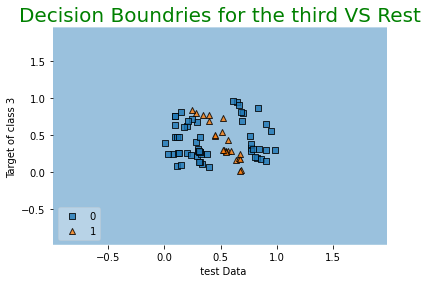

In [38]:
##cont. OVR problem
clf_3 = SVC(kernel='linear', probability=True)
clf_3.fit(xtr, yb3)
print('Accuracy of clf_3: {:.2f}%'.format(getAccuracy(clf_3, xte, ybt3)))
plt.title('Decision Boundries for the third VS Rest',fontsize=20,loc='center',color='green')
plt.xlabel('  test Data')
plt.ylabel('Target of class 3')
plot_decision_regions(xte,ybt3, clf=clf_3, legend=3)
yb3_pred = clf_3.predict_proba(xte)[:,1].reshape(-1,1)

Accuracy of clf_4: 93.75%


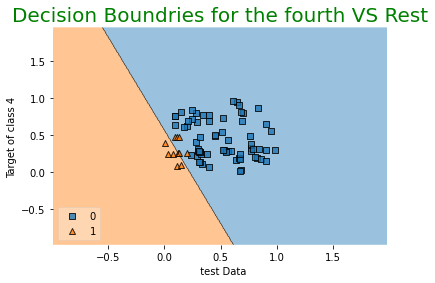

In [39]:
##cont. OVR problem
clf_4 = SVC(kernel='linear', probability=True)
clf_4.fit(xtr, yb4)
print('Accuracy of clf_4: {:.2f}%'.format(getAccuracy(clf_4, xte, ybt4)))
plt.title('Decision Boundries for the fourth VS Rest',fontsize=20,loc='center',color='green')
plt.xlabel('  test Data')
plt.ylabel('Target of class 4')
plot_decision_regions(xte,ybt4, clf=clf_4, legend=3)
yb4_pred = clf_4.predict_proba(xte)[:,1].reshape(-1,1)

Accuracy of One Vs Rest: 86.25%


C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


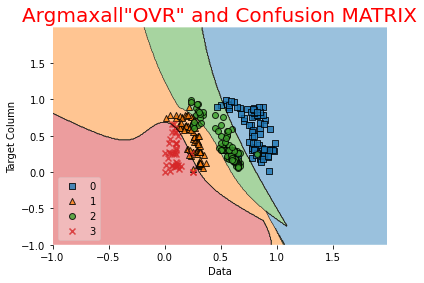

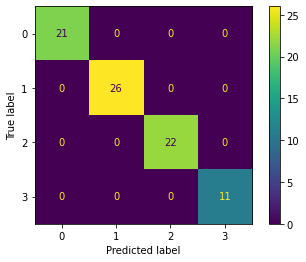

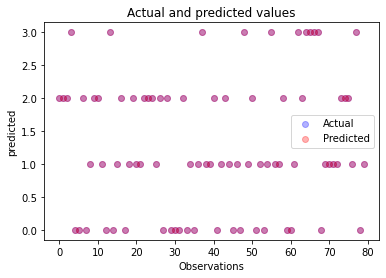

In [40]:
## OVR aggregate confidence scores and plotting decision,confusionMT,Error
clf_5 = SVC(kernel='poly', probability=True)
clf_5.fit(xte, yte)
argyp=clf_5.predict(xte)
yb_all = np.hstack((yb1_pred, yb2_pred, yb3_pred,yb4_pred))
yb_all
m = mlb.classes_[np.argmax(yb_all, axis=1)]
m.reshape((-1,1))
yp1=list(yte)
yp2=list(m)
plt.xlabel('Data')
plt.ylabel('Target Column')
plt.title('Argmaxall"OVR" and Confusion MATRIX',fontsize=20,loc='center',color='red')
print ('Accuracy of One Vs Rest: {:.2f}%'.format(accuracy_score(yp2,yp1)*100))
plot_decision_regions(xtr,y, clf=clf_5, legend=3)
ConfusionMatrixDisplay(confusion_matrix(argyp, yte)).plot()
error(yte,argyp)

In [41]:
ov_xte=d1[['PEG', 'LPR']].to_numpy()  #whole data values
ov_yte =d1['UNS'].to_numpy()      #whole test target

In [42]:
###Preparing Training,Testing data for the OVO Problem
l1=[0]
def part(d):
    for i in l1:
        ovtr1=d.drop(d.index[d['UNS']==2])
        ovtr1=ovtr1.drop(d.index[d['UNS']==3])
        ov_ytr01 =ovtr1[['UNS']].to_numpy()
        ov_xtr01=ovtr1[['PEG', 'LPR']].to_numpy()
####1
        ovtr2=d.drop(d.index[d['UNS']==1])
        ovtr2=ovtr2.drop(d.index[d['UNS']==3])
        ov_ytr02 =ovtr2[['UNS']].to_numpy()
        ov_xtr02=ovtr2[['PEG', 'LPR']].to_numpy()
####2
        ovtr3=d.drop(d.index[d['UNS']==1])
        ovtr3=ovtr3.drop(d.index[d['UNS']==2])
        ov_ytr03 =ovtr3[['UNS']].to_numpy()
        ov_xtr03=ovtr3[['PEG', 'LPR']].to_numpy()
###3
        ovtr4=d.drop(d.index[d['UNS']==0])
        ovtr4=ovtr4.drop(d.index[d['UNS']==3])
        ov_ytr12 =ovtr4[['UNS']].to_numpy()
        ov_xtr12=ovtr4[['PEG', 'LPR']].to_numpy()
####4
        ovtr5=d.drop(d.index[d['UNS']==0])
        ovtr5=ovtr5.drop(d.index[d['UNS']==2])
        ov_ytr13 =ovtr5[['UNS']].to_numpy()
        ov_xtr13=ovtr5[['PEG', 'LPR']].to_numpy()
####5
        ovtr6=d.drop(d.index[d['UNS']==0])
        ovtr6=ovtr6.drop(d.index[d['UNS']==1])
        ov_ytr23 =ovtr6[['UNS']].to_numpy()
        ov_xtr23=ovtr6[['PEG', 'LPR']].to_numpy()
    return ov_xtr01,ov_ytr01,ov_xtr02,ov_ytr02,ov_xtr03,ov_ytr03,ov_xtr12,ov_ytr12,ov_xtr13,ov_ytr13,ov_xtr23,ov_ytr23

In [43]:
#Calling the Function that prepared the data
xtr01,ytr01,xtr02,ytr02,xtr03,ytr03,xtr12,ytr12,xtr13,ytr13,xtr23,ytr23=part(d)
xte01,yte01,xte02,yte02,xte03,yte03,xte12,yte12,xte13,yte13,xte23,yte23=part(d1)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


Voting To Find Majority: ('The Major Class is', 1, ' It occured', 48)
Accuracy OVO : 58.75%


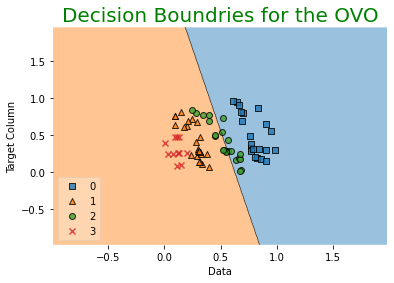

In [44]:
###OVO Problem_Model1
ot01=fitov(clf_1,xtr01,ytr01,ov_xte,ov_yte)
ot01

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Voting To Find Majority: ('The Major Class is', 2, ' It occured', 59)
Accuracy OVO : 53.75%


C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


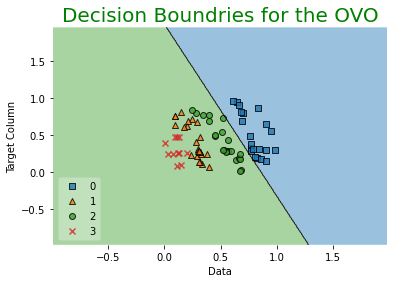

In [45]:
###CONT, OVO Problem_Model2
ot02=fitov(clf_1,xtr02,ytr02,ov_xte,ov_yte)
ot02

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


Voting To Find Majority: ('The Major Class is', 3, ' It occured', 39)
Accuracy OVO : 40.00%


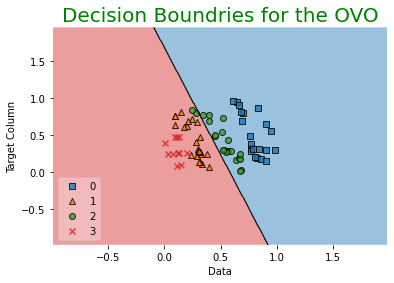

In [46]:
###CONT, OVO Problem_Model3
ot03=fitov(clf_1,xtr03,ytr03,ov_xte,ov_yte)
ot03

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Voting To Find Majority: ('The Major Class is', 1, ' It occured', 39)
Accuracy OVO : 57.50%


C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


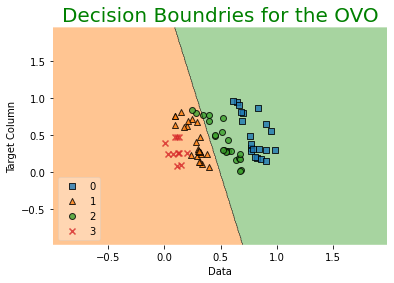

In [47]:
###CONT, OVO Problem_Model4
ot12=fitov(clf_1,xtr12,ytr12,ov_xte,ov_yte)
ot12

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Voting To Find Majority: ('The Major Class is', 1, ' It occured', 74)
Accuracy OVO : 40.00%


C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


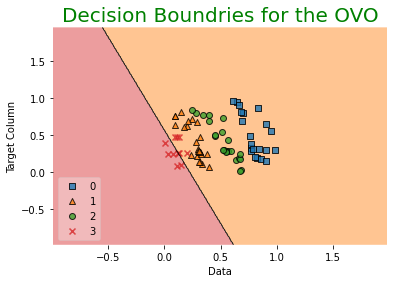

In [48]:
###CONT, OVO Problem_Model5
ot13=fitov(clf_1,xtr13,ytr13,ov_xte,ov_yte)
ot13

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


Voting To Find Majority: ('The Major Class is', 3, ' It occured', 22)
Accuracy OVO : 41.25%


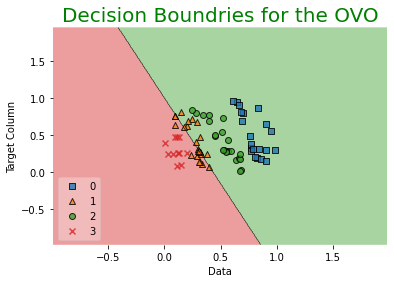

In [49]:
###CONT, OVO Problem_Model6
ot23=fitov(clf_1,xtr23,ytr23,ov_xte,ov_yte)
ot23

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignori

ArgMax Accuracy for all models of One Vs one: 97.50%


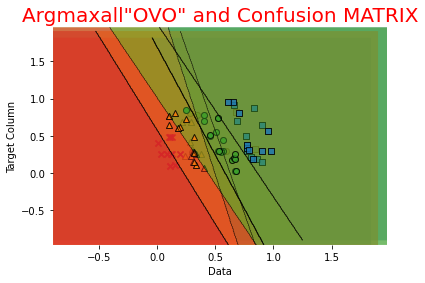

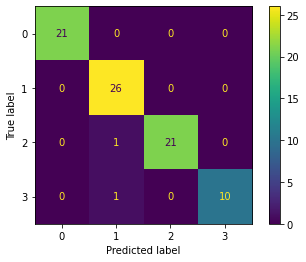

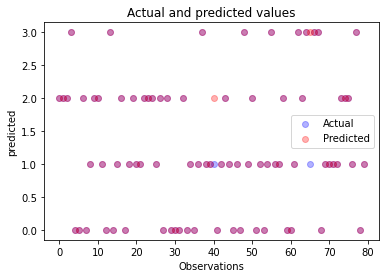

In [50]:
####getting the probabilty for every model on OVO 
###OVO aggregate confidence scores and plotting decision,confusionMT,Error
myArr =[0,1,2,3]
pairList =[]
D1UNS =d1.UNS
pairModel =[]
OVTEST=d1[['PEG', 'LPR']].to_numpy()
pairprob=[]
for i in myArr:
    newList=myArr[myArr.index(i)+1:]
    for x in  newList:
      pairList.append([i,x])
for pair in pairList:
  # print(pair[0])
  #================Training Data Pair 0,1::0,2 etc ==========
  ov_pair = d.loc[d['UNS'].isin(pair)]
  ov_xtr=ov_pair[['PEG', 'LPR']].to_numpy()
  ov_ytr =ov_pair[['UNS']]
  yOv = ov_pair.iloc[:,-1].to_numpy() 
  # ===============Testing Data Pair 0,1::0,2 etc ========
  ovXte1 = d1.loc[d['UNS'].isin(pair)]
  ov_xte1=d1[['PEG', 'LPR']].to_numpy()
  ov_xte1p=ovXte1[['PEG', 'LPR']].to_numpy()
  yOv = ovXte1.iloc[:,-1].to_numpy()
  ot =SVC(kernel='linear', probability=True )
  ot.fit(ov_xtr, ov_ytr)
  y_predov= ot.predict(ov_xte1)
  acc =accuracy_score(y_predov ,D1UNS)*100
  OVO_pred= ot.predict_proba(OVTEST)
  pairprob.append(OVO_pred)
    ########Ploting all OVO Models together in one Decision Boundry
  plot_decision_regions(ov_xte1p,yOv, clf=ot,legend=0)
Class00= pairprob[0][:,0].reshape(-1,1) + pairprob[1][:,0].reshape(-1,1) +pairprob[2][:,0].reshape(-1,1)
Class11 = pairprob[0][:,1].reshape(-1,1) + pairprob[3][:,0].reshape(-1,1) + pairprob[4][:,0].reshape(-1,1)
Class22 = pairprob[1][:,1].reshape(-1,1) + pairprob[3][:,1].reshape(-1,1) + pairprob[5][:,0].reshape(-1,1)
Class33= pairprob[2][:,1].reshape(-1,1) + pairprob[4][:,1].reshape(-1,1) + pairprob[5][:,1].reshape(-1,1)
clf_8 = SVC(kernel='poly', probability=True)
clf_8.fit(ov_xte1, D1UNS)
argyp2=clf_8.predict(ov_xte1)
yb_all2=np.hstack((Class00, Class11, Class22, Class33))
# yb_all2 collecting all classes predictions for probabilities 
m = mlb.classes_[np.argmax(yb_all2, axis=1)]
m.reshape((-1,1))
ypp1=list(m)
ypp2=list(D1UNS)
print ('ArgMax Accuracy for all models of One Vs one: {:.2f}%'.format(accuracy_score(ypp1,ypp2)*100))##Overall Accuracy
plt.title('Argmaxall"OVO" and Confusion MATRIX',fontsize=20,color='red')
plt.xlabel('Data')
plt.ylabel('Target Column')
ConfusionMatrixDisplay(confusion_matrix(argyp, ypp1)).plot()
error(m,argyp2)